# **Problem statement**


To understand the influence of the parents background, test preparation etc on students performance


## Data Collection

downloading from the www.kaggle.com


### Importing required modules,packages and data


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import the csv data as pandas dataframe

In [49]:
df = pd.read_csv(r'C:\Users\Veneel\OneDrive\Documents\GitHub\venv\notebook\StudentsPerformance.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [55]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [56]:
print("categories in 'gender' variable:  ",end=" "  )
print(df['gender'].unique())


print("categories in 'race/ethnicity' : ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())


print("categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

print("categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race/ethnicity' :  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'test preparation course' variable:  ['none' 'completed']
categories in 'lunch' variable:  ['standard' 'free/reduced']


In [57]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features),categorical_features))



We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
df['total_score']=(df['math score'] + df['reading score'] + df['writing score'])
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [61]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score']== 100]['average'].count()
math_full = df[df['math score']== 100]['average'].count()


print(f'number of students with full marks in maths: {math_full}')
print(f'number of students with full marks in maths: {writing_full}')
print(f'number of students with full marks in maths: {reading_full}')


number of students with full marks in maths: 7
number of students with full marks in maths: 14
number of students with full marks in maths: 17


In [62]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')





Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


Histogram and KDE


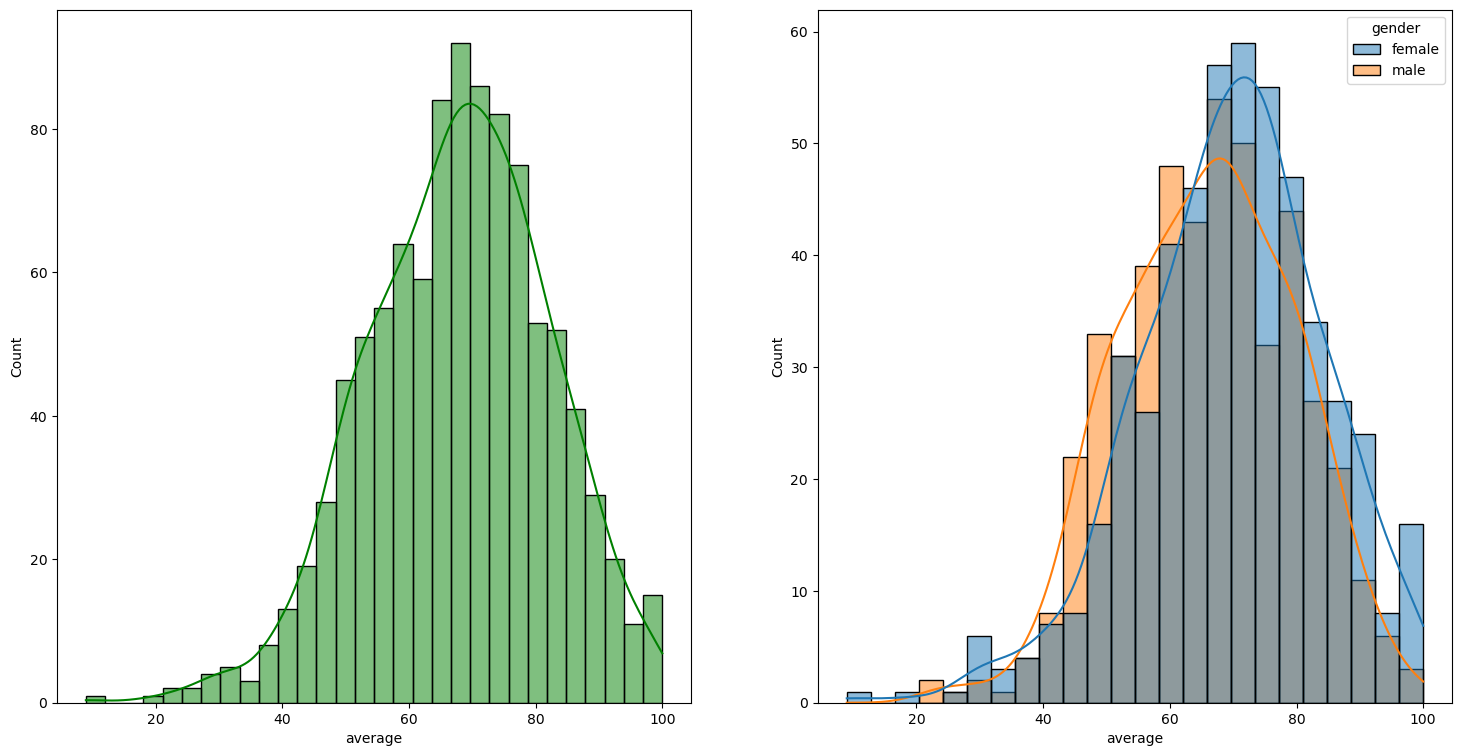

In [63]:
fig, axs = plt.subplots(1,2, figsize=(18,9))
plt.subplot(121)
sns.histplot(data=df,x='average' , bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average', kde=True,hue='gender')
plt.show()